# Autoencoder for Image Reconstruction

## Autoencoder Implementation

> checkout the ```autoencoder.py``` file

## Training and Visualization on MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from autoencoder import MLPAutoencoder
from tqdm import tqdm
from autoencoder import MLPAutoencoder, train_autoencoder

In [2]:
# Load MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data.astype('float32').values / 255.0  # normalize to [0,1]
y = mnist.target.astype(int).values

# Train/test split (first 60k train, rest test)
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print(f'Train: {X_train.shape}, Test: {X_test.shape}')

Train: (60000, 784), Test: (10000, 784)


#### Training

In [3]:
# Build and train MNIST autoencoder
# Architecture: 784 -> 256 -> 64 (bottleneck) -> 256 -> 784
mnist_ae = MLPAutoencoder(
    enc_dims=[784, 256],
    bottleneck=64,
    dec_dims=[256],
    act_type='relu'
)

losses = train_autoencoder(
    mnist_ae,
    X_train,
    epochs=20,
    batch_size=128,
    lr=0.5,
    show_progress=True
)

Epoch 1 avg loss: 0.066591


Epoch 2 avg loss: 0.039116


Epoch 3 avg loss: 0.030649


Epoch 4 avg loss: 0.025592


Epoch 5 avg loss: 0.022000


Epoch 6 avg loss: 0.019274


Epoch 7 avg loss: 0.017195


Epoch 8 avg loss: 0.015677


Epoch 9 avg loss: 0.014639


Epoch 10 avg loss: 0.013752


Epoch 11 avg loss: 0.012987


Epoch 12 avg loss: 0.012292


Epoch 13 avg loss: 0.011757


Epoch 14 avg loss: 0.011260


Epoch 15 avg loss: 0.010783


Epoch 16 avg loss: 0.010423


Epoch 17 avg loss: 0.010051


Epoch 18 avg loss: 0.009697


Epoch 19 avg loss: 0.009436


Epoch 20 avg loss: 0.009149


#### Visvualisation

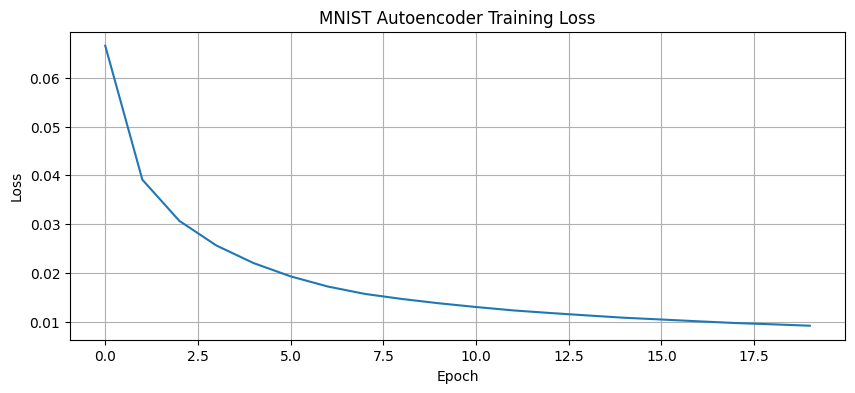

In [6]:
# Plot training loss
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MNIST Autoencoder Training Loss')
plt.grid(True)
plt.show()

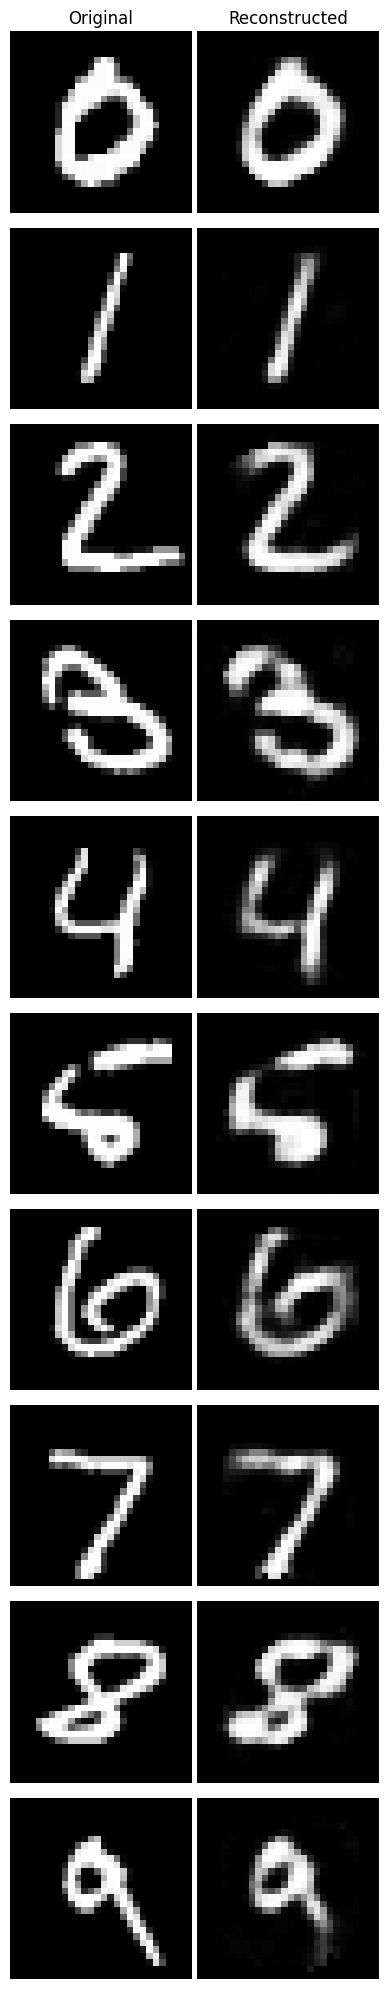

In [7]:
# Visualize reconstructions for each digit (0-9)
fig, axes = plt.subplots(10, 2, figsize=(4, 20))

for digit in range(10):
    # Find first test sample of this digit
    idx = np.where(y_test == digit)[0][0]
    original = X_test[idx].reshape(1, -1)
    recon = mnist_ae.predict(original).reshape(28, 28)
    
    # Original
    axes[digit, 0].imshow(original.reshape(28, 28), cmap='gray')
    axes[digit, 0].axis('off')
    if digit == 0:
        axes[digit, 0].set_title('Original')
    axes[digit, 0].set_ylabel(f'Digit {digit}', fontsize=12)
    
    # Reconstruction
    axes[digit, 1].imshow(recon, cmap='gray')
    axes[digit, 1].axis('off')
    if digit == 0:
        axes[digit, 1].set_title('Reconstructed')

plt.tight_layout()
plt.show()